In [10]:
import pandas as pd
import ast
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [11]:
with open('out.txt', 'r') as f:
    data = [ast.literal_eval(line.strip()) for line in f if line.strip()]

df = pd.DataFrame(data)
df.head()

,closing_time_of_funding_and_candle,hourly_funding_rate,annualized_funding_rate,premium,openPrice,closingPrice,volume
0,1719792000182,0.000013,0.109500,0.000593,NaN,NaN,NaN
1,1719795600104,0.000015,0.130244,0.000619,NaN,NaN,NaN
2,1719799200025,0.000027,0.233640,0.000713,NaN,NaN,NaN
3,1719802800176,0.000013,0.109500,0.000452,NaN,NaN,NaN
4,1719806400007,0.000035,0.308073,0.000781,NaN,NaN,NaN


In [12]:
df['target_funding_rate'] = df['hourly_funding_rate'].shift(-1)
df = df.dropna()

In [13]:
features = ['openPrice', 'closingPrice', 'volume', 'premium', 'hourly_funding_rate']
X = df[features]
y = df['target_funding_rate']

In [14]:
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MAE: 0.00000538
RMSE: 0.00000969


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


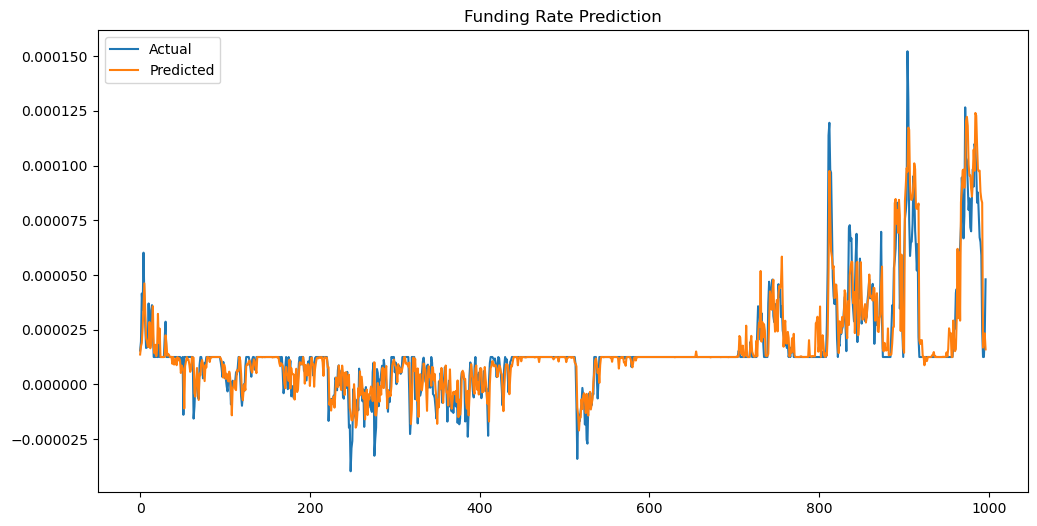

In [16]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae:.8f}")
print(f"RMSE: {rmse:.8f}")
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Funding Rate Prediction')
plt.show()

In [17]:
print("Mean funding rate:", y.mean())
print("Std funding rate:", y.std())
print("Min funding rate:", y.min())
print("Max funding rate:", y.max())

Mean funding rate: 8.893364873544762e-06
Std funding rate: 1.6133860802247116e-05
Min funding rate: -7.78924e-05
Max funding rate: 0.0001554815
